In [2]:
import os
import sys
from pathlib import Path
import anndata as ad
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import style
import pyvista as pv
import pandas as pd
style.use('seaborn-white')

%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, "D:/00ScienceStudy/Biology/Spateo/spateo-release")
import spateo as st

In [5]:
sample_id, anno_key, spatial_key = "E11.5", "mapped_celltype", "3d_align_spatial"
# adata = ad.read(f"./data/Mouse_{sample_id}_full_data_600k_updated.h5ad")
# pc_model = st.tdr.read_model(f"./data/Mouse_{sample_id}_full_data_600k_pc_model.vtk")
mesh_model = st.tdr.read_model(f"./data/Mouse_{sample_id}_full_data_600k_mesh_model.vtk")

In [ ]:
mesh_model['mapped_celltype_rgba'][:,3] = 1

In [5]:
embryo_pc = pv.read('./MouseEmbryo_11.5_new.vtk')

ERROR:root:Algorithm vtkPolyDataReader (000002A65B192610) returned failure for request: vtkInformation (000002A66A255850)


In [ ]:
embryo_pc = st.tdr.rotate_model(model=embryo_pc, angle=(0, 0, 150), rotate_center= embryo_pc.center, inplace=False)
embryo_pc.points = embryo_pc.points  - embryo_pc.points.min(axis=0)

In [6]:
_, _ = st.pl.three_d_plot(
    model=mesh_model, 
    key="tissue", 
    model_style="surface", 
    opacity=1,
    model_size=2,
    colormap=None,
    show_legend=False,
    show_axes=True,
    jupyter=False,
    cpo="xy",
    window_size=(2048, 2048),
    background='white',
)

d:\Anaconda\envs\Spateo\lib\site-packages\pyvista\plotting\plotter.py:6665: UserWarning:

Not within a jupyter notebook environment.
Ignoring ``jupyter_backend``.



In [ ]:
_, _ = st.pl.three_d_plot(
    model=st.tdr.collect_models([mesh_model, embryo_pc]), 
    key="tissue", 
    model_style=["surface", "points"], 
    opacity=[0.2, 1],
    model_size=2,
    colormap=None,
    show_legend=False,
    show_axes=False,
    jupyter=False,
    cpo="xy",
    window_size=(2048, 2048),
    background='white',
)

In [7]:
# import pyvista as pv
# pv.global_theme.transparent_background = True

# # input_image_path = "Spateo_Mouse_Embryo_E115_{}_with_mesh.png".format(tissue_name)
# figure_folder = 'D:/00ScienceStudy/Biology/Spateo/Figure_design/Fig2/Panel_H/'
# _ = st.pl.three_d_plot(
#     model=st.tdr.collect_models([mesh_model, embryo_pc]), 
#     key="tissue", 
#     model_style=["surface", "points"], 
#     opacity=[0.2, 1],
#     model_size=2,
#     colormap=None,
#     show_legend=False,
#     show_axes=False,
#     jupyter="static",
#     cpo="xy",
#     window_size=(2048, 2048),
#     background='white',
#     filename=figure_folder + 'test.tiff'
#     # os.path.join(img_out_dir, f"mouse_{sample_id}_embryo_pc_model_ds5percent.tiff")
# )

In [9]:
tissue_name = 'Ganglion'
tissue_pc = pv.read('./data/tissue_models_115_new_clip/{}_clip.vtk'.format(tissue_name))
tissue_ind = pd.Series(embryo_pc['obs_index']).isin(tissue_pc['obs_index'])
other_tissue_align_pc = embryo_pc.extract_points(~tissue_ind)
main_tissue_align_pc = embryo_pc.extract_points(tissue_ind)
other_tissue_align_pc['tissue_rgba'] = np.tile(np.array([[0.5,0.5,0.5,1]]), [other_tissue_align_pc.n_cells,1])

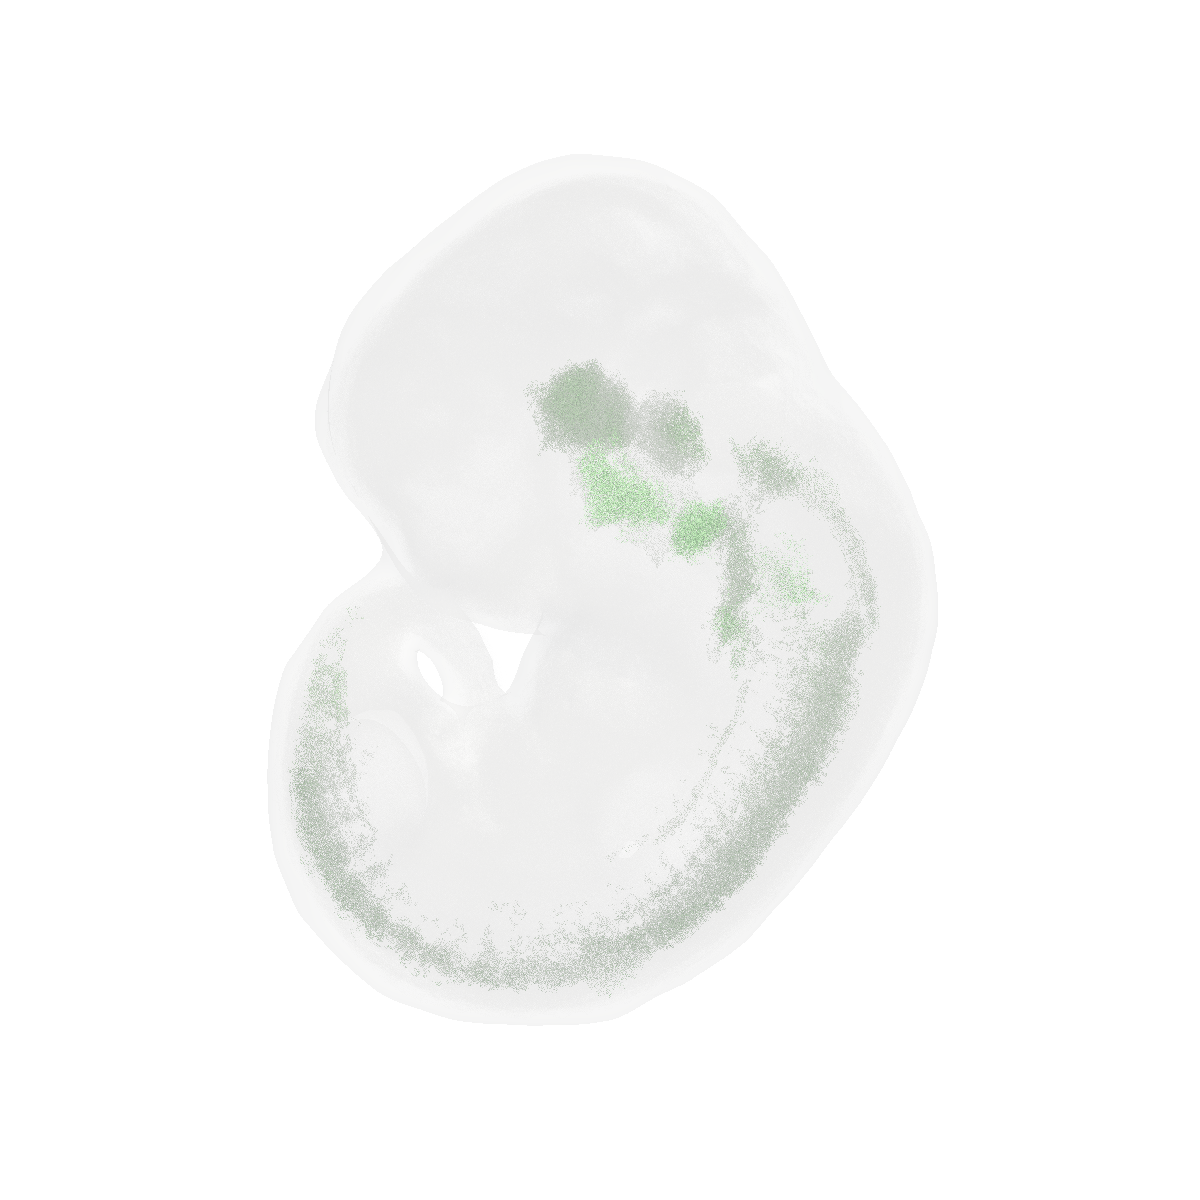

In [11]:
import pyvista as pv
pv.global_theme.transparent_background = True

input_image_path = "Spateo_Mouse_Embryo_E115_{}_with_mesh_new.tiff".format(tissue_name)
figure_folder = 'D:/00ScienceStudy/Biology/Spateo/Figure_design/Fig2/Panel_H/'
_ = st.pl.three_d_plot(
    model=st.tdr.collect_models([mesh_model, other_tissue_align_pc, main_tissue_align_pc]), 
    key="tissue", 
    model_style=["surface", "points", "points"], 
    opacity=[0.2, 0.05, 1],
    model_size=1,
    colormap=None,
    show_legend=False,
    show_axes=False,
    jupyter="static",
    cpo="xy",
    window_size=(1200, 1200),
    background=np.array([247,248,248]) / 255,
    ambient=0.2,
    filename=figure_folder + input_image_path
)

In [25]:
tissue_name = 'PNS'
tissue_pc = pv.read('./data/tissue_models_115_new_clip/{}_clip.vtk'.format(tissue_name))

In [26]:
tissue_name2 = 'Connective tissue'
tissue_pc2 = pv.read('./data/tissue_models_115_new_clip/{}_clip.vtk'.format(tissue_name2))

In [27]:
tissue_ind = pd.Series(embryo_pc['obs_index']).isin(tissue_pc['obs_index'])
tissue_ind2 = pd.Series(embryo_pc['obs_index']).isin(tissue_pc2['obs_index'])

In [28]:
# tissue_align_pc = embryo_pc.copy()
main_tissue_align_pc = embryo_pc.extract_points(tissue_ind)
main_tissue_align_pc2 = embryo_pc.extract_points(tissue_ind2)
other_tissue_align_pc = embryo_pc.extract_points(~(tissue_ind | tissue_ind2))
other_tissue_align_pc['tissue_rgba'] = np.tile(np.array([[0.5,0.5,0.5,1]]), [other_tissue_align_pc.n_cells,1])

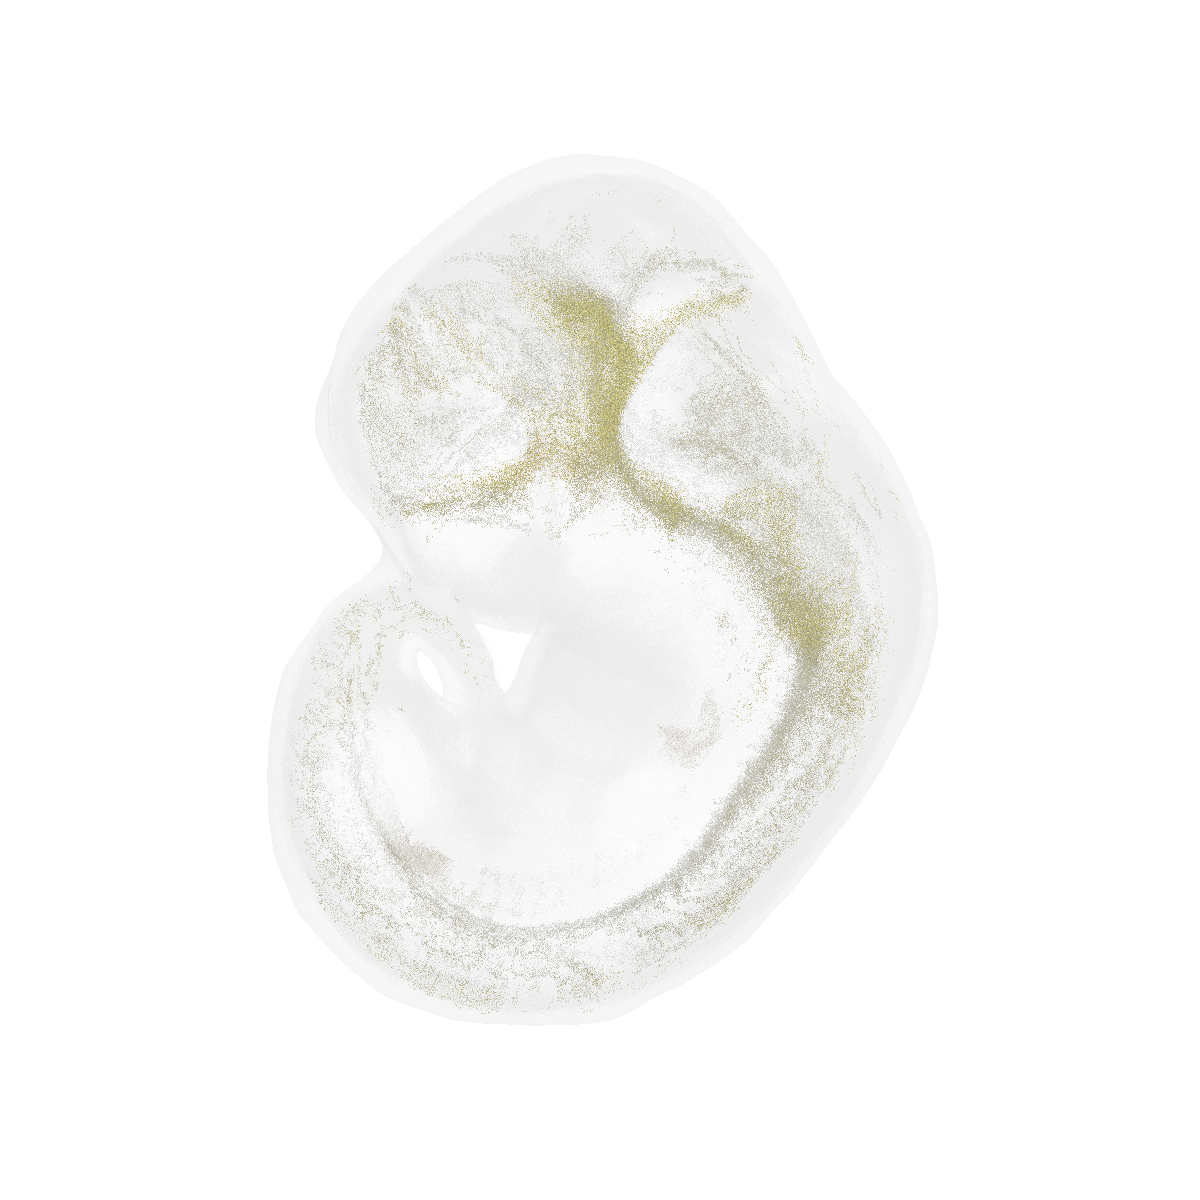

In [29]:
import pyvista as pv
pv.global_theme.transparent_background = True

input_image_path = "Spateo_Mouse_Embryo_E115_{}_{}_with_mesh_new.tiff".format(tissue_name, tissue_name2)
figure_folder = 'D:/00ScienceStudy/Biology/Spateo/Figure_design/Fig2/Panel_H/'
_ = st.pl.three_d_plot(
    model=st.tdr.collect_models([mesh_model, other_tissue_align_pc, main_tissue_align_pc, main_tissue_align_pc2]), 
    key="tissue", 
    model_style=["surface", "points", "points", "points"], 
    opacity=[0.2, 0.1, 1, 1],
    model_size=1,
    colormap=None,
    show_legend=False,
    show_axes=False,
    jupyter="static",
    cpo="xy",
    window_size=(1200, 1200),
    background=np.array([247,248,248]) / 255,
    ambient=0.2,
    filename=figure_folder + input_image_path
)

In [30]:
# import pyvista as pv
# pv.global_theme.transparent_background = True

# input_image_path = "Spateo_Mouse_Embryo_E115_{}_{}_with_mesh_new.tiff".format(tissue_name, tissue_name2)
# figure_folder = 'D:/00ScienceStudy/Biology/Spateo/Figure_design/Fig2/Panel_H/'
# _ = st.pl.three_d_plot(
#     model=st.tdr.collect_models([mesh_model, other_tissue_align_pc, main_tissue_align_pc, main_tissue_align_pc2]), 
#     key="tissue", 
#     model_style=["surface", "points", "points", "points"], 
#     opacity=[0.2, 0.1, 1, 1],
#     model_size=1,
#     colormap=None,
#     show_legend=False,
#     show_axes=False,
#     jupyter="static",
#     cpo="xy",
#     window_size=(1200, 1200),
#     background='white',
#     filename=figure_folder + input_image_path
#     # os.path.join(img_out_dir, f"mouse_{sample_id}_embryo_pc_model_ds5percent.tiff")
# )